In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [6]:
digits = load_digits()

X = digits.data      # features (1797, 64)
y = digits.target    # labels (1797,)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1797, 64)
y shape: (1797,)


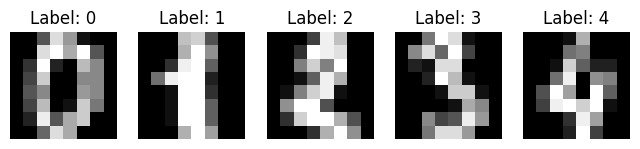

In [7]:
plt.figure(figsize=(8,3))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(digits.images[i], cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")

plt.show()


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [9]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with K=3:", accuracy)


Accuracy with K=3: 0.9694444444444444


In [11]:
k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)

print("Accuracies:", accuracies)


Accuracies: [0.9694444444444444, 0.975, 0.9722222222222222, 0.9722222222222222]


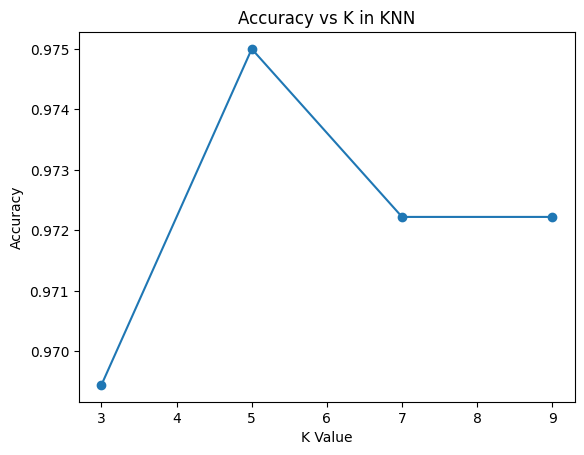

In [12]:

plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K in KNN")
plt.show()


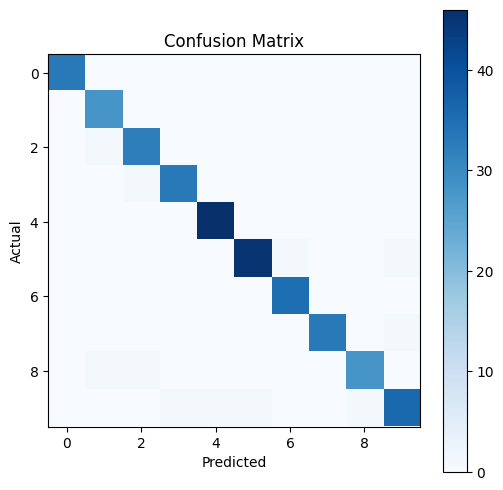

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()


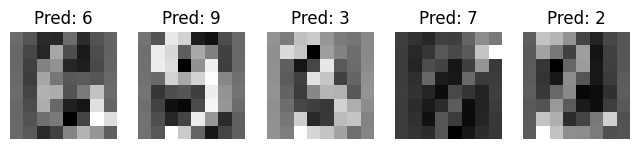

In [14]:
plt.figure(figsize=(8,3))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap="gray")
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis("off")

plt.show()
